## EE 242 Lab 2b – Convolution - Denoising audio signals and images

Ewan, Sean, Tyson

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, simpleaudio/librosa, and matplotlib.pyplot.  

In [2]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import scipy.io.wavfile as sp
import scipy.signal as sig
import matplotlib.pyplot as plt
from librosa import display
import librosa
import simpleaudio as sa
import soundfile as sf
import IPython
from PIL import Image
import skimage
# import whatever other modules you use in this lab -- there are more that you need than we've included 


## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week lab.  You should plan on completing the first 2 assignments in the first week.

## Lab 2b turn in checklist

•	Lab 2b Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** (You may also use : https://www.vertopal.com/  suggested by a student)




## Assignment 3 -- Removing Noise from an Audio Signal

In this assignment, we’ll artificially add noise to an audio signal and then apply the system you used in Assignment 2 to remove it. You will need the audio packages that you used in Lab 1. This assignment will have three parts, A-C

**A.** Read in the trombone sound file provided and name it tr_orig.  This is a mono signal, so we will only need to worry about the single channel. Create a noise sequence that is the length of tr_orig using the numpy.random.randn() noise generation function with a scaling factor of 100. (It needs to be larger to be audible given the range of tr_orig.) Then add the two signals to create tr_noisy.  Save tr_noisy to a new wav file.

**B.**  Apply the convolution filter from Assignment 2 to remove the noise from tr_noisy, creating a signal called tr_filt. Save this signal as a wav file.

**C.** Read in both the noisy and filtered versions using simpleaudio and play the two files and the original to hear the effect of the noise and noise removal. 

In [3]:
# Assignment 3 - Code goes here

# A. Read in the trombone sound file provided and name 
# it tr_orig. This is a mono signal, so we will only need 
# to worry about the single channel. Create a noise sequence 
# that is the length of tr_orig using the numpy.random.randn() 
# noise generation function with a scaling factor of 100. (It needs 
# to be larger to be audible given the range of tr_orig.) Then add the two 
# signals to create tr_noisy. Save tr_noisy to a new wav file.

s_tr, tr_orig = sp.read("trombone11.wav")

print(max(tr_orig))
tr_length = tr_orig.size

noise = np.random.randn(tr_length) * 100

tr_noisy = np.add(tr_orig, noise)

print(tr_noisy)
sp.write('tr_noisy.wav', s_tr, tr_noisy.astype('int16'))

# B. Apply the convolution filter from Assignment 2 to remove the 
# noise from tr_noisy, creating a signal called tr_filt. Save this signal as a wav file.

# convolution window width / 2
k = 20

N = 2 * k + 1
hfilt = np.ones(N) * (1 / N)
filt_tr = np.convolve(tr_noisy, hfilt, mode = 'full')

sp.write('filt_tr11.wav', s_tr, filt_tr.astype('int16'))

# C. Read in both the noisy and filtered versions using simpleaudio 
# and play the two files and the original to hear the effect of the noise and noise removal.


print("original")
IPython.display.display(IPython.display.Audio('tr_noisy.wav'))


print("filtered with noise")
IPython.display.display(IPython.display.Audio("filt_tr11.wav"))

11145
[  4.04989753 -89.43468233  83.53704301 ... 166.73694445  25.52240302
  62.67207932]
original


filtered with noise


###  Discussion

Comment on the differences in how the original and noise-removed signals sound. Comment on the impact of large increases or decreases in the value of k. 

The relationship betweenh k and the signal is that k determines how smoothed the signal is, a larger k means a smoother signal, but this results in also diminishing the amplitude to a greater extent over the given window. When k is super small, the noise in the signal is still present.


## Assignment 4 -- Convolution with Images

This assignment is meant to introduce you to convolution of signals in higher dimensions. A canonical example of a 2D signal is an image. With a time signal, the impulse response has a single independent variable (time), so a discrete-time convolution has a sum over that variable. With a 2-D image, the impulse response is 2-D, so the convolution involves a double sum. Be sure to import the scipy ndimage and skimage color packages. This assignment will have four parts, A-D. Put part A (a function you will define) in its own cell and the other parts together in a separate cell. Be sure to provide a title for all the images you are plotting in each part.

**A.**  Write a function that takes an image as input and runs the Sobel edge detector (described in the background document) and returns 3 images: the horizontal edges, the vertical edges and the combined result.   

**B.**  Start a new cell and read in the image of a dragonfly provided, and convert it to grayscale. Note that the variable ‘image’ will have normalized 8-bit (0 - 1) pixel brightness values. Run the edge detector function on the dragonfly image and display the original with the 3 
outputs in a 2 by 2 figure.

**C.**  Define a 10x10 kernel where all elements have value 0.01. This impulse response is giving an average over the 10x10 window, and it should have a smoothing effect on the image, similar to the moving window for the time signal.  Convolve the image with this filter using ndimage.convolve(). Plot the original and the smoothed image side by side.  You should notice that smoothing blurs the image a little.

**D.** Run the edge detector function on the smoothed dragonfly image and plot the result side-by-side with the result from the edge detector on the original image.



<IPython.core.display.Javascript object>


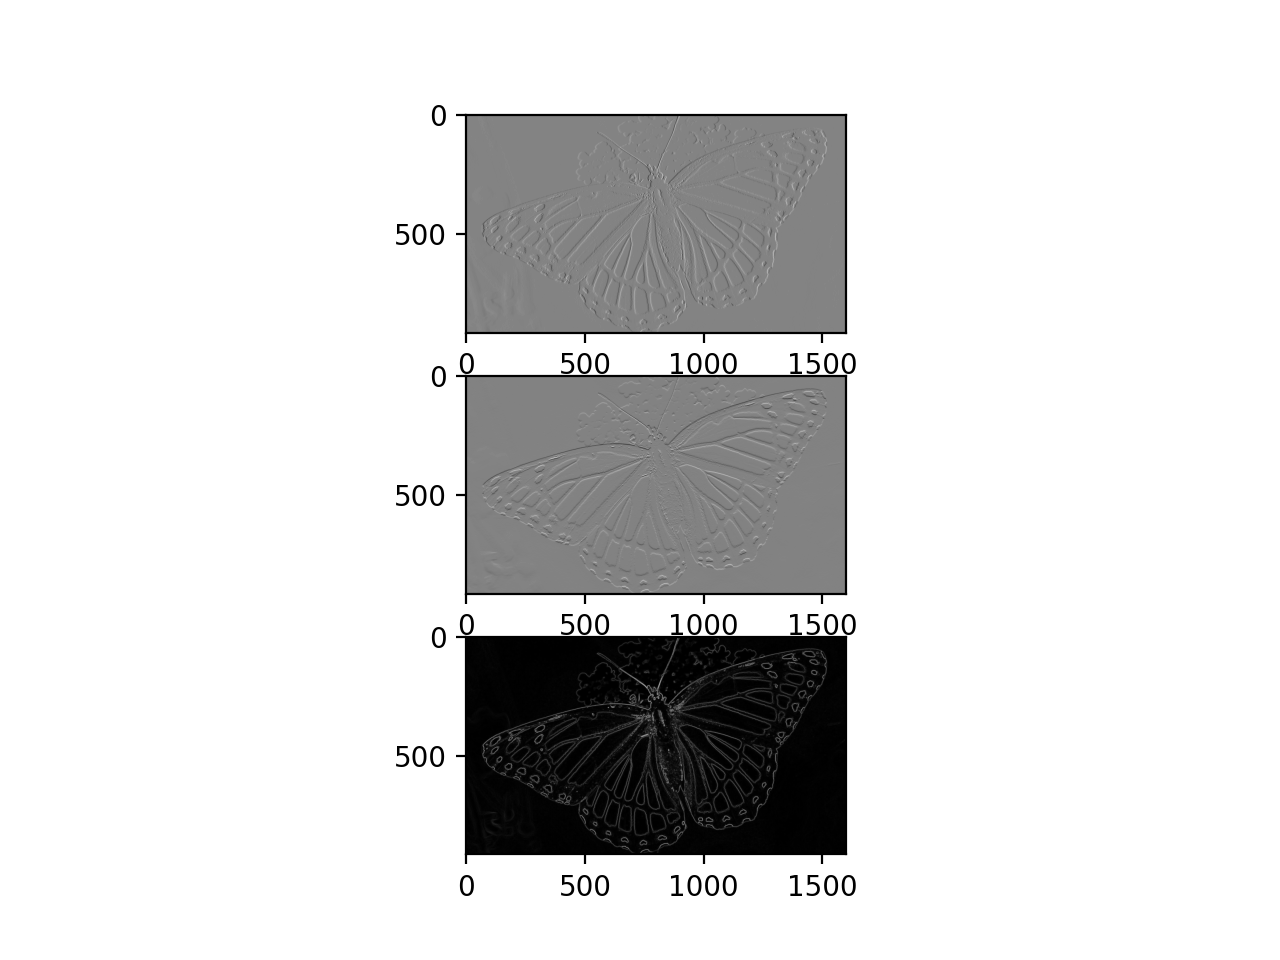

<IPython.core.display.Javascript object>


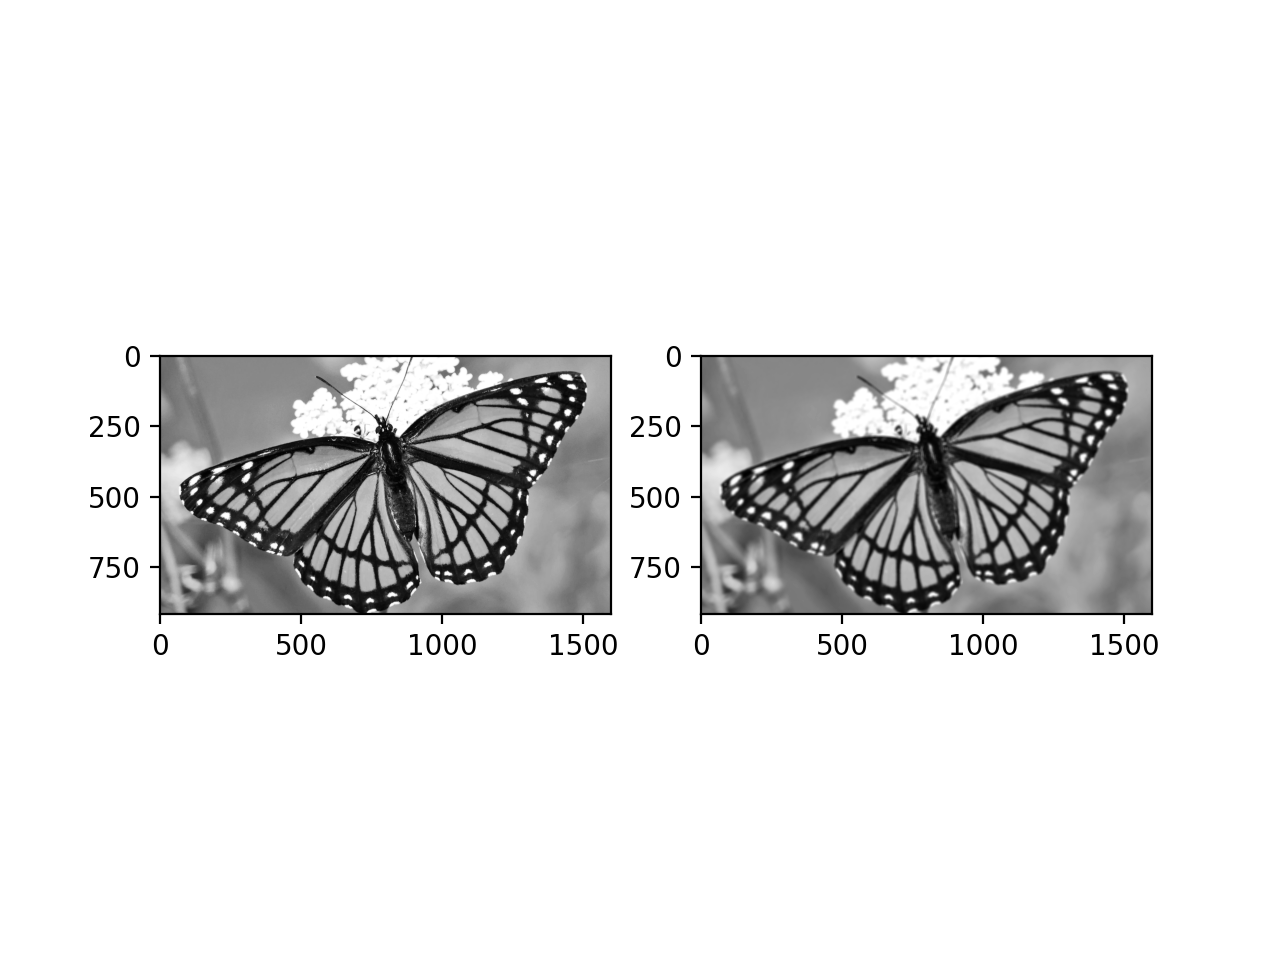

<IPython.core.display.Javascript object>


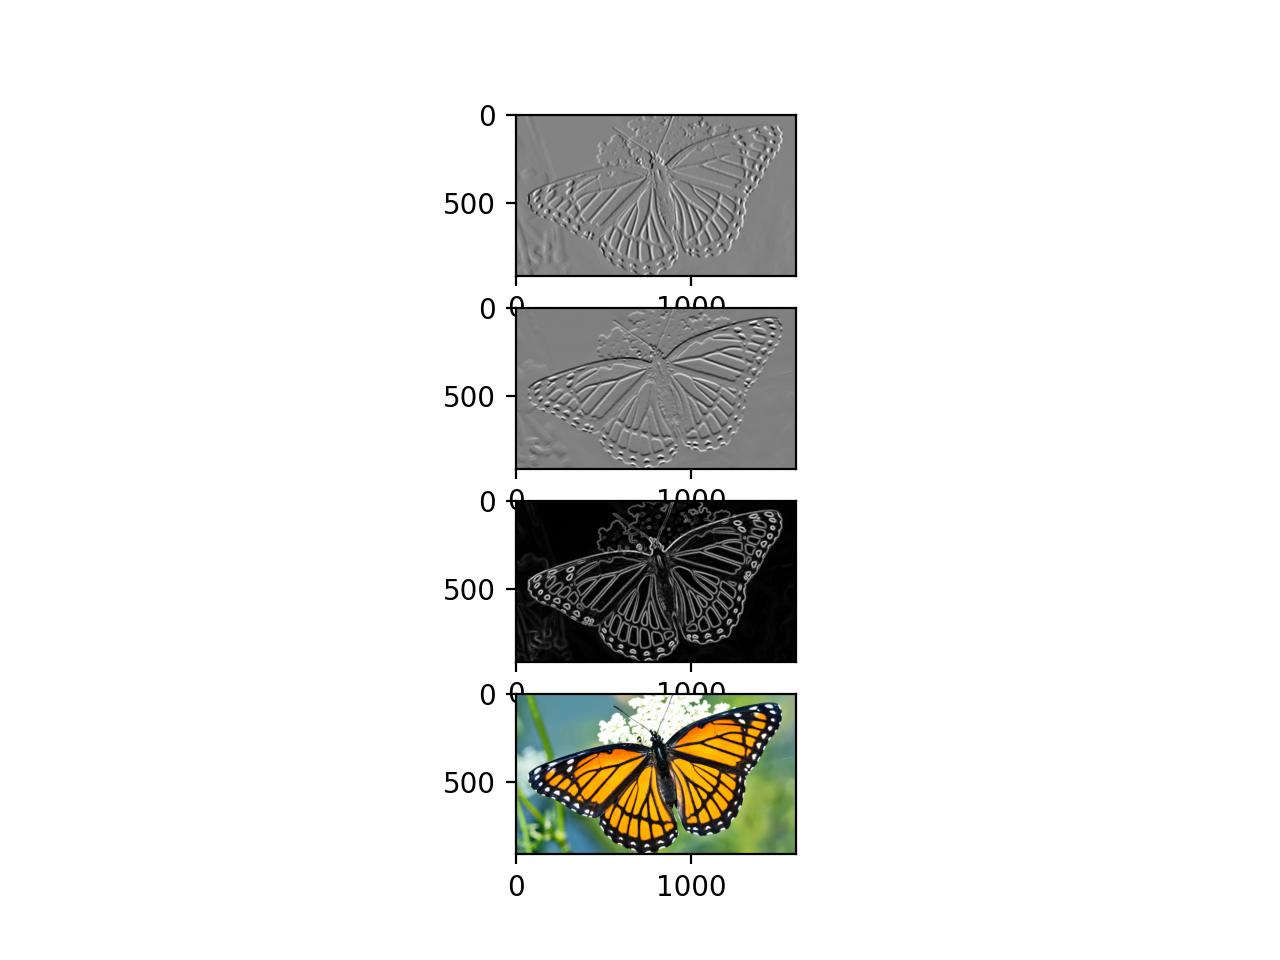

In [7]:
# Assignment 4 - Code Goes here
# A. Write a function that takes an image as input and runs the Sobel 
# edge detector (described in the background document) and returns 3 images: 
# the horizontal edges, the vertical edges and the combined result.

from scipy import ndimage 



def edge_detector(image):
    h1 = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]
    h2 = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]
    
    h_e = ndimage.filters.convolve(image, h1) 
    v_e = ndimage.filters.convolve(image, h2)
    comb_image = np.sqrt(np.multiply(h_e,h_e) + np.multiply(v_e, v_e))
    return h_e, v_e, comb_image

# B. Start a new cell and read in the image of a dragonfly provided, and 
# convert it to grayscale. Note that the variable ‘image’ will have normalized 
# 8-bit (0 - 1) pixel brightness values. Run the edge detector function on the 
# dragonfly image and display the original with the 3 outputs in a 2 by 2 figure.

#plt.imshow()
dragonfly = skimage.io.imread('butterfly.jpg')
dragonflygray = skimage.color.rgb2gray(dragonfly)     # 8-bit code grayscale

d_h, d_v, d_comb = edge_detector(dragonflygray)

fig, (img1, img2, img3) = plt.subplots(3,1)
img1.imshow(d_h, cmap = 'gray')
img2.imshow(d_v, cmap = 'gray')
img3.imshow(d_comb, cmap = 'gray')


# C. Define a 10x10 kernel where all elements have value 0.01. 
# This impulse response is giving an average over the 10x10 window, 
# and it should have a smoothing effect on the image, similar to the moving 
# window for the time signal. Convolve the image with this filter using ndimage.convolve(). 
# Plot the original and the smoothed image side by side. You should notice that smoothing 
#blurs the image a little.

kernel1 = np.ones((10,10)) * 0.1


dragonfly_smooth = ndimage.filters.convolve(dragonflygray, kernel1)

fig, ax = plt.subplots(1,2)
ax[0].imshow(dragonflygray, cmap = 'gray')
ax[1].imshow(dragonfly_smooth, cmap = 'gray')

# PART D

dragonfly_smooth_filtered = edge_detector(dragonfly_smooth)

fig, ax = plt.subplots(4,1)
ax[0].imshow(dragonfly_smooth_filtered[0], cmap = 'gray')
ax[1].imshow(dragonfly_smooth_filtered[1], cmap = 'gray')
ax[2].imshow(dragonfly_smooth_filtered[2], cmap = 'gray')
ax[3].imshow(dragonfly)





###  Discussion

Describe the differences in the results using the edge detector on the original vs. smoothed image. Comment on how the results change if you use a larger size smoothing filter.

The difference between using the edge detector on the original image vs. the smoothed one comes at the resultant quality. There's less noise/sharpness in the smoothed image meaning more of a blur from the original dragonfly image. When using a larger size smoothing filter, it further blurs the image.
